### Training YoloV4-Tiny on Custom Dataset

In [ ]:
# !darknet detector train indoor_object.data my_yolov4-tiny-custom.cfg yolov4-tiny.conv.29 -dont_show -mjpeg_port 8090 -ma


#### Loss After 20000 Iteration

In [2]:
def imShow(path):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline

    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()

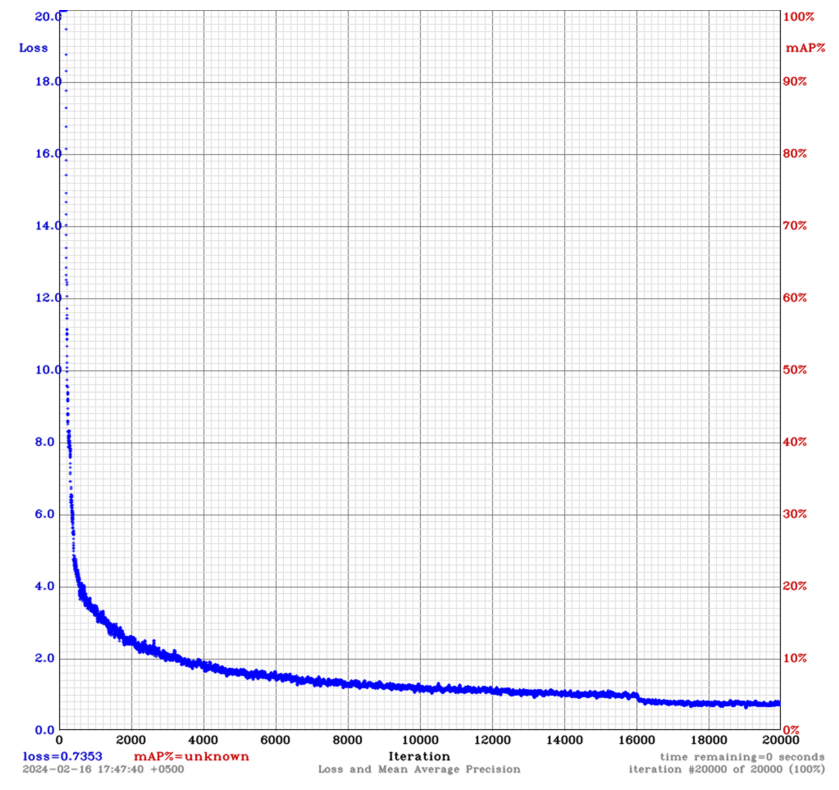

In [8]:
imShow('chart.png')

### Model Performance on Validation Data

In [18]:
#!darknet detector map indoor_object.data my_yolov4-tiny-custom.cfg backup/my_yolov4-tiny-custom_final.weights

Darknet v2.0-87-g256b7eed
CUDA runtime version 11080 (v11.8), driver version 12040 (v12.4)
cuDNN version 11080 (v8.9.7), use of half-size floats is ENABLED
=> 0: NVIDIA GeForce RTX 3090 [#8.6], 24.0 GiB
OpenCV v4.5.4
 0 : compute_capability = 860, cudnn_half = 1, GPU: NVIDIA GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           -

### Model Testing On Different Images

In [1]:
#!darknet detector test indoor_object.data my_yolov4-tiny-custom.cfg backup/my_yolov4-tiny-custom_final.weights 126.jpg -thresh 0.5

skipped validating of argument #8 (0.5)
Darknet v2.0-87-g256b7eed
CUDA runtime version 11080 (v11.8), driver version 12040 (v12.4)
cuDNN version 11080 (v8.9.7), use of half-size floats is ENABLED
=> 0: NVIDIA GeForce RTX 3090 [#8.6], 24.0 GiB
OpenCV v4.5.4
 0 : compute_capability = 860, cudnn_half = 1, GPU: NVIDIA GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 r

In [2]:
#!darknet detector test indoor_object.data my_yolov4-tiny-custom.cfg backup/my_yolov4-tiny-custom_final.weights 2.jpg -thresh 0.5

skipped validating of argument #8 (0.5)
Darknet v2.0-87-g256b7eed
CUDA runtime version 11080 (v11.8), driver version 12040 (v12.4)
cuDNN version 11080 (v8.9.7), use of half-size floats is ENABLED
=> 0: NVIDIA GeForce RTX 3090 [#8.6], 24.0 GiB
OpenCV v4.5.4
 0 : compute_capability = 860, cudnn_half = 1, GPU: NVIDIA GeForce RTX 3090 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 r

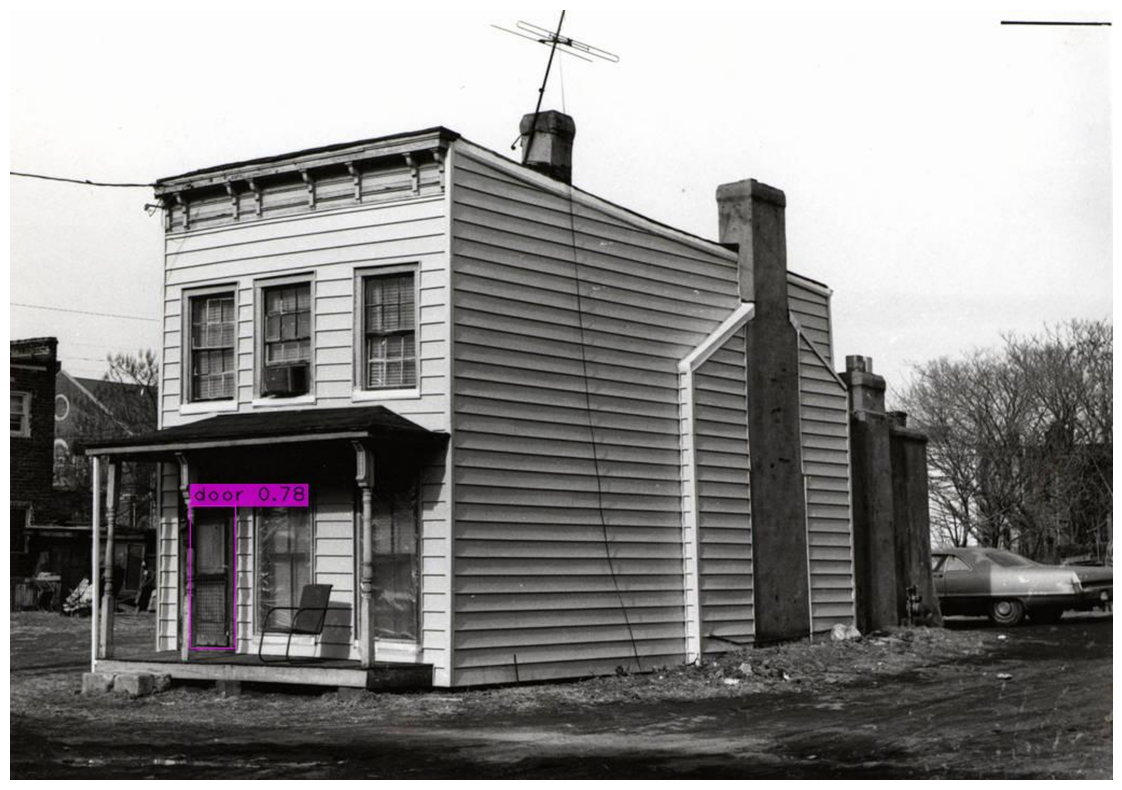

In [3]:
imShow('predictions.jpg')

#### References

Dataset https://www.kaggle.com/datasets/thepbordin/indoor-object-detection <br>
Darknet https://github.com/AlexeyAB 